# Chicago Bulls Show or Michael Jordan Show ???

Importing Libraries

In [ ]:
!pip install bqplot

In [1]:
%matplotlib inline
import matplotlib.pyplot as pt
import numpy as np
import pandas as pd
import matplotlib 
import ipywidgets
from ipywidgets import interactive
import PIL.Image as image
import bqplot
from bqplot import pyplot as plt

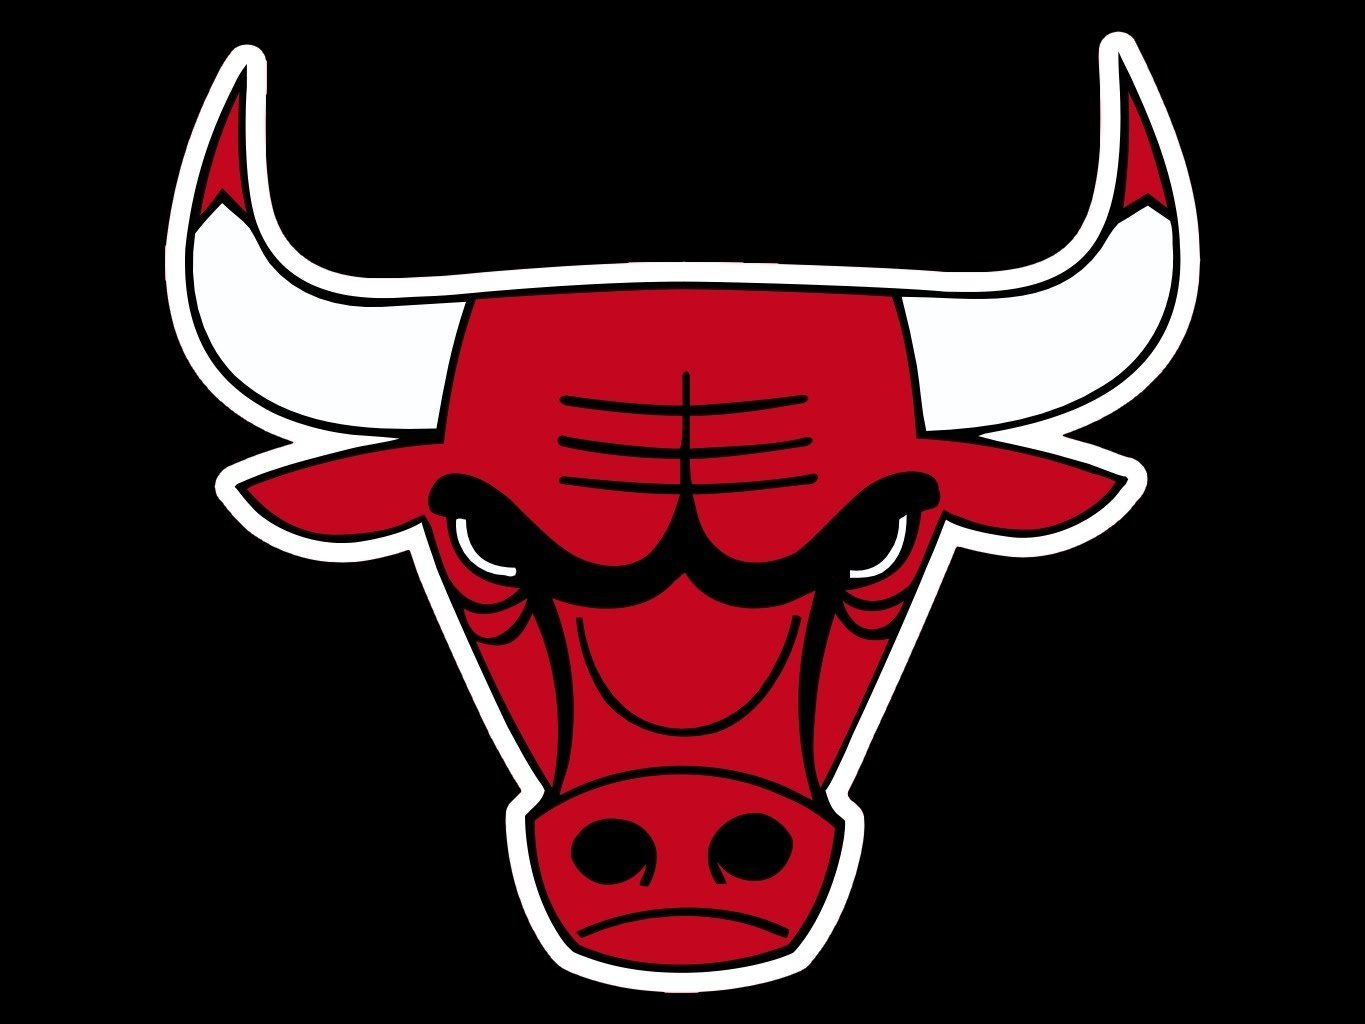

Importing NBA statistical data downloaded from Kaggle. This dataset contains information about NBA players, teams, Statistics. This file has data for last 20 years. It spans from 1991 till 2021. 

In [2]:
players = pd.read_csv('Player_stats.csv', encoding= 'unicode_escape')

In [3]:
players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


Converting the points (PTS) into int to avoid dtype error. 

In [4]:
players['PTS'] = players['PTS'].astype('int')

In the code below, I am removing the * from the dataset. 

In [5]:
players["Player"] = players["Player"].str.replace("*","", regex=False)

In [6]:
players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


I am creating pivot table to organize my data accordingly to visualize a heat map. My index is team, columns will be years and it would display win/ loss percentage of each team for all 20 years. 

In [7]:
players_analysis = pd.pivot_table(players, index='Team', columns='Year', values='W/L%', aggfunc='mean', fill_value=0)

In [8]:
players_analysis

Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Team,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,0.524,0.463,0.524,0.695,0.512,0.561,0.683,0.610,0.62,0.341,...,0.606,0.537,0.463,0.732,0.585,0.524,0.293,0.354,0.299,0.569
Boston Celtics,0.683,0.622,0.585,0.390,0.427,0.402,0.183,0.439,0.38,0.427,...,0.591,0.506,0.305,0.488,0.585,0.646,0.671,0.598,0.667,0.500
Brooklyn Nets,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,...,0.000,0.598,0.537,0.463,0.256,0.244,0.341,0.512,0.486,0.667
Charlotte Bobcats,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,...,0.106,0.256,0.524,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Charlotte Hornets,0.317,0.378,0.537,0.500,0.610,0.500,0.659,0.622,0.52,0.598,...,0.000,0.000,0.000,0.402,0.585,0.439,0.439,0.476,0.354,0.458
Chicago Bulls,0.744,0.817,0.695,0.671,0.573,0.878,0.841,0.756,0.26,0.207,...,0.758,0.549,0.585,0.610,0.512,0.500,0.329,0.268,0.338,0.431
Cleveland Cavaliers,0.402,0.695,0.659,0.573,0.524,0.573,0.512,0.573,0.44,0.390,...,0.318,0.293,0.402,0.646,0.695,0.622,0.610,0.232,0.292,0.306
Dallas Mavericks,0.341,0.268,0.134,0.159,0.439,0.317,0.293,0.244,0.38,0.488,...,0.545,0.500,0.598,0.610,0.512,0.402,0.293,0.402,0.573,0.583
Denver Nuggets,0.244,0.293,0.439,0.512,0.500,0.427,0.256,0.134,0.28,0.427,...,0.576,0.695,0.439,0.366,0.402,0.488,0.561,0.659,0.630,0.653


## NBA Team & Player Performance Analysis 1991 - 2021

I am creating a bar plot, it will display the points scored by each player in a team in a given year. 

In [9]:
#Barplot 1
x_scs = bqplot.OrdinalScale()
y_scs = bqplot.LinearScale()

x_axs = bqplot.Axis(label='Player', scale=x_scs)
y_axs = bqplot.Axis(label='Points Won', scale=y_scs,
orientation = 'vertical')

bar_plot = bqplot.pyplot.bar(x = [],
y = [],
scales={'x':x_scs, 'y':y_scs})

fig_dur = bqplot.Figure(marks=[bar_plot], axes=[x_axs,y_axs], fig_margin={'top':20, 'bottom':60, 'left':40, 'right':80})

In this code chunk below, I am creating a heat map which will display team names on the Y axis, Year on the x axis and the interactivity of the plot will be when you select a particular box from heat map, then it will display the bar chart with player names on x axis and points on Y axis. 

In [10]:
col_sc = bqplot.ColorScale(scheme='Red', min=np.nanmin(players_analysis.values), max=np.nanmax(players_analysis.values))
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label = 'Year')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label = 'Teams')

heat_map = bqplot.GridHeatMap(color=players_analysis.values,
                            row = players_analysis.index, column = players_analysis.columns,
                            scales={'color':col_sc, 'row':y_sc, 'column':x_sc},
                            interactions={'click':'select'},
                            anchor_style={'fill':'blue'})


def barplot_fig2(x, y):
    df2 = players[(players['Team'] == x) & (players['Year'] == y)]
    df2 = df2.groupby('Player')['PTS'].mean()
    return df2


mySelectedLabel = ipywidgets.Label()
def on_selected(change):
    if len(change['owner'].selected) == 1:
        i,j = change['owner'].selected[0]
        v = players_analysis.values[i,j]
        mySelectedLabel.value = 'Mean W/L% for: ' + players_analysis.index[i] + ', and Year: ' + str(players_analysis.columns[j]) + ' = ' + str(v)
        analysis_final2 = barplot_fig2(players_analysis.index[i], players_analysis.columns[j])
        bar_plot.x = analysis_final2.index
        bar_plot.y = analysis_final2.values
heat_map.observe(on_selected, 'selected')

fig = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax], fig_margin={'top':30, 'bottom':60, 'left':80, 'right':100})

myDashboard = ipywidgets.VBox([mySelectedLabel, fig, fig_dur])
myDashboard


When someone sees my dashboard, they would come across heat map where they will see team names on y axis and years on x axis. They can select a team they like and year of their choice, this would show a bar chart of players, playing in the team that year and average points scored by the players. They would also see the win/ loss % of team in that particular year as they select the box. The colors on heat map represents the variance in the value of win/loss %. dark color means low % and light shaded colors mean high %. There are some teams which were discontinued or were established during this timeline so you can see low or 0 in that case. 

I think, we can display more information about the teams when someone selects the dashboard. I found teams dataset which contains the team statistics (i.e.) wins, losses, percentages etc about each team for every year. If we slect year and team, it would display the team statistics for that particular team for that year in a bar chart. I have loaded the data below and link is provided in the reference. 

# Was Chicago Bulls 1996 Season their Best Performance till Date?

In the code below, I am making a new dataframe consisiting only Chicago Bulls team performance for 1996 Season. 

In [11]:
df2 = players[(players['Team'] == "Chicago Bulls") & (players['Year'] == 1996)]

In the code below, I am plotting the Chicago Bulls Players and the number of Games played by each Player. 

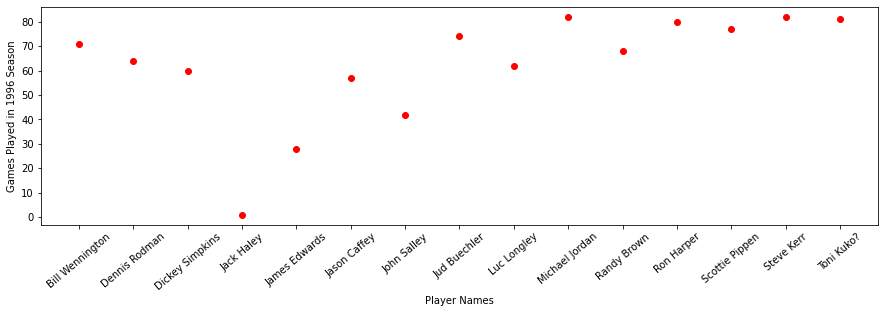

In [12]:
fig, ax = pt.subplots(figsize = (15,4))
ax.scatter(x = df2['Player'], y= df2['G'], color = 'red')
pt.xlabel('Player Names')
pt.ylabel('Games Played in 1996 Season')
pt.xticks(rotation= 40)
pt.show()

In the code below, I am plotting Average points per game scored by each player in 1996 Season 

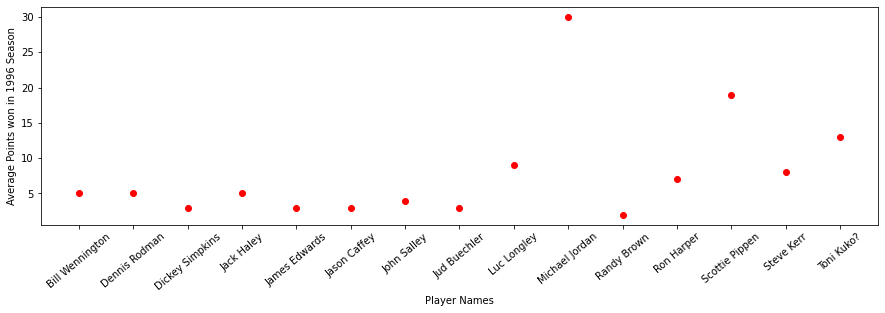

In [13]:
fig, ax = pt.subplots(figsize = (15,4))
ax.scatter(x = df2['Player'], y= df2['PTS'], color = 'red')
pt.xlabel('Player Names')
pt.ylabel('Average Points won in 1996 Season')
pt.xticks(rotation= 40)
pt.show()

# Chicago Bulls Performance after 1996 Season

In the code below, I am creating another dataframe containing Chicago Bulls performance only for 30 Years.  

In [14]:
df = players[(players['Team'] == "Chicago Bulls")]
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
211,A.J. Guyton,PG,22,CHI,33,8,19.1,2.4,5.8,0.406,...,0,0.0,Chicago Bulls,15,67,0.183,37.0,87.6,96.7,-9.09
212,Brad Miller,C,24,CHI,57,45,25.2,2.9,6.8,0.435,...,0,0.0,Chicago Bulls,15,67,0.183,37.0,87.6,96.7,-9.09
213,Bryce Drew,PG,26,CHI,48,41,27.2,2.6,6.8,0.379,...,0,0.0,Chicago Bulls,15,67,0.183,37.0,87.6,96.7,-9.09
214,Corey Benjamin,PG,22,CHI,65,5,13.2,1.8,4.6,0.381,...,0,0.0,Chicago Bulls,15,67,0.183,37.0,87.6,96.7,-9.09
215,Dalibor Bagari?,C,20,CHI,35,0,7.4,0.5,1.9,0.262,...,0,0.0,Chicago Bulls,15,67,0.183,37.0,87.6,96.7,-9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13462,Marcus Fizer,PF,24,CHI,38,0,21.3,4.7,10.1,0.465,...,0,0.0,Chicago Bulls,30,52,0.366,20.0,95.0,100.1,-5.31
13463,Rick Brunson,PG,30,CHI,17,0,11.5,1.4,2.9,0.460,...,0,0.0,Chicago Bulls,30,52,0.366,20.0,95.0,100.1,-5.31
13464,Roger Mason,SF,22,CHI,17,0,6.6,0.6,1.8,0.355,...,0,0.0,Chicago Bulls,30,52,0.366,20.0,95.0,100.1,-5.31
13465,Trenton Hassell,SG,23,CHI,82,53,24.4,1.8,4.8,0.367,...,0,0.0,Chicago Bulls,30,52,0.366,20.0,95.0,100.1,-5.31


I am grouping by the data by Year and then win/loss % to make a line graph of performance of Chicago Bulls for 30 years. 

In [15]:
years = df.groupby("Year")["W/L%"].mean()
years

Year
1991    0.744
1992    0.817
1993    0.695
1994    0.671
1995    0.573
1996    0.878
1997    0.841
1998    0.756
1999    0.260
2000    0.207
2001    0.183
2002    0.256
2003    0.366
2004    0.280
2005    0.573
2006    0.500
2007    0.598
2008    0.402
2009    0.500
2010    0.500
2011    0.756
2012    0.758
2013    0.549
2014    0.585
2015    0.610
2016    0.512
2017    0.500
2018    0.329
2019    0.268
2020    0.338
2021    0.431
Name: W/L%, dtype: float64

In [16]:
years.index

Int64Index([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='Year')

Below, I have made a line graph visualizing the Team performance of Chicago Bulls.

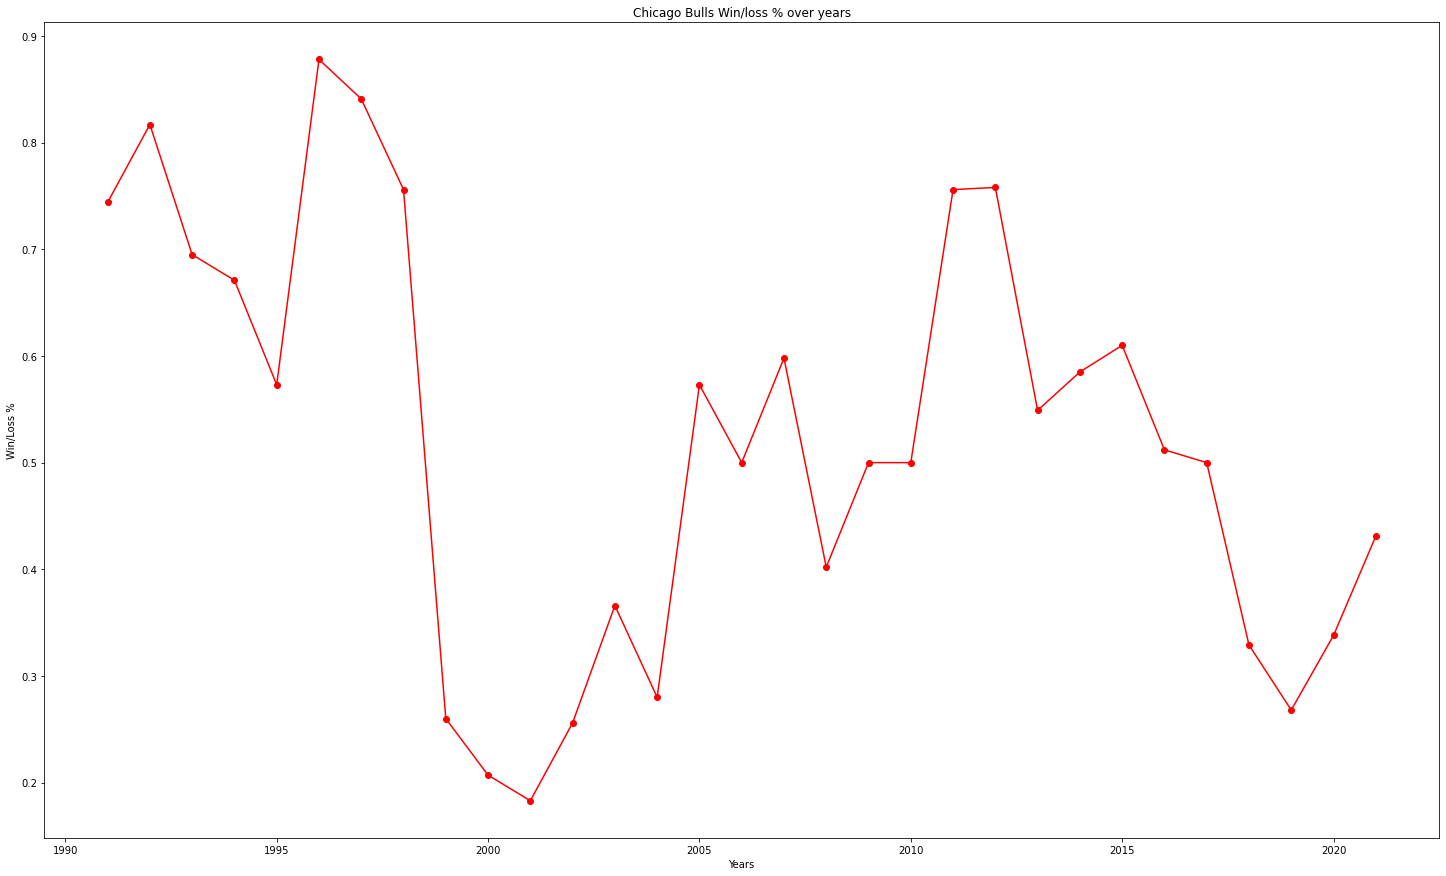

In [17]:
pt.figure(figsize=(25,15))
pt.plot(years.index, years.values,color = 'red', marker = 'o')
pt.xlabel('Years')
pt.ylabel('Win/Loss %')
pt.title('Chicago Bulls Win/loss % over years')
pt.show()

Chicago Bulls one of the most successful teams of NBA has never won another NBA trophy since 1998. Most of the fans asks, are they ever going to win it again. All bulls fan were upset when the last championship team was dismantled after 1998, the executives thought it was time to change but the team has never seen those glory days back again. 

To dive further into the analysis, we can see the performance of our favourite team over the years and see their win/loss % for that year, along with players and their average points scored per game. I am going to do the analysis on my favourite team, Chicago Bulls. It is history that in 1996 Season, when Michael Jordan decided to unreitre himself and come back to NBA he made the biggest news in NBA history. Not just Chicago Bulls fan, but the whole NBA fans were happy and wanted to see him play and he didn't dissapoint. Chicago Bulls treated the Whole NBA fans with amazing performances, I wish I could have witnessed that myself. 

In the first scatter plot, we can see the total number of games played by each player in that 1996 season. We can see all the important players were available throughout the season and they competed on regular basis. 2nd scatter plot shows us the average points scored by each player per game in 1996 season. It is no doubt that Michael Jordan scored the most points, but one thing to mention here is other players also had a great average points. The chart does not say so, but all player were competing with the GOAT (Michael Jordan) so comparision is out of question. 

The biggest question is what happened to Chicago Bulls after that 1996 Season. They went ahead and won two more championship. Before the start of his final season, it was announced that it will be last season of team coach Phil Jackson and Micheal Jordan did not wanted to play under other coach's leadership, which led him to retire again. The 1998 season was their last championship team. Lets have a look at the team's performance. In this line chart, I have tried to measure the team performance on the basis of win/loss % ( win/total games * 100 ) of the team. In line chart, we can see dip in performance in 1994 and 1995 season as Michael Jordan was trying his luck in baseball during that time. The biggest dip came in 1999 season as the whole team was dismantled. Since then, Chicago Bulls have never been able to recover to those glory days.They showed some glimpses in 2011 and 2012 seasons but that was short lived. 

As a fan of Chicago Bulls, I want to know the reasoning behind the decision of changing the whole roster back in 1998. According to me, the biggest reason of their win was Michael Jordan, the whole team was made around him and he motivated everyone to perform at his level. We talk about these big players like Lebron James, Kobe bryant and many others. These are great players, but did all of these had the ability to lift the whole team by themselves. Every season, the bulls fan await the champaionship victory, they have not lost their hope and loyalty. They are waiting that one day another Michael Jordan will be part of Chicago Bulls and conquer the NBA. 

The name of the dataset is 1991-2021 NBA stats dataset. I am free to share and adapt the data according to the license, its approved for works and its free. License link is provided. There are 5 different files in this dataset. I am one file of player stats whose size is 2538kb. 

https://creativecommons.org/licenses/by/4.0/


References:

1: https://www.kaggle.com/datasets/vivovinco/19912021-nba-stats

2: https://www.kaggle.com/code/vivovinco/nba-stats-data-cleaning

3: https://bqplot.readthedocs.io/en/latest/api_documentation.html#scales

4:https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek07%2Fprep_notebook_week07_part1.ipynb

5: https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek07%2Fprep_notebook_week07_part2.ipynb

6:https://ipywidgets.readthedocs.io/en/latest/embedding.html

7:https://bqplot.readthedocs.io/en/latest/_generate/bqplot.marks.Bars.html

8: https://en.wikipedia.org/wiki/Chicago_Bulls

9: https://datatofish.com/line-chart-python-matplotlib/
